# **Customer Churn Analysis**

## **1.Dataset loading**

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **2.Checking basic details**

In [6]:
df.shape

(7043, 21)

In [6]:
df = df.drop('customerID', axis = 1)

In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## **3.EDA**

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------------------")

Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: in

In [ ]:
for i in df.columns:
  my_crosstab = pd.crosstab(index=df["Churn"],columns=df[i],margins=True)
  print(my_crosstab)
  print("___________________________________________________________")

gender  Female  Male   All
Churn                     
0         2549  2625  5174
1          939   930  1869
All       3488  3555  7043
___________________________________________________________
SeniorCitizen     0     1   All
Churn                          
0              4508   666  5174
1              1393   476  1869
All            5901  1142  7043
___________________________________________________________
Partner    No   Yes   All
Churn                    
0        2441  2733  5174
1        1200   669  1869
All      3641  3402  7043
___________________________________________________________
Dependents    No   Yes   All
Churn                       
0           3390  1784  5174
1           1543   326  1869
All         4933  2110  7043
___________________________________________________________
tenure   0    1    2    3    4    5    6  ...  67   68  69   70   71   72   All
Churn                                     ...                                  
0       11  233  115  106   93

In [18]:
df_cont=df[['tenure','MonthlyCharges', 'TotalCharges']]
df_cata=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']]

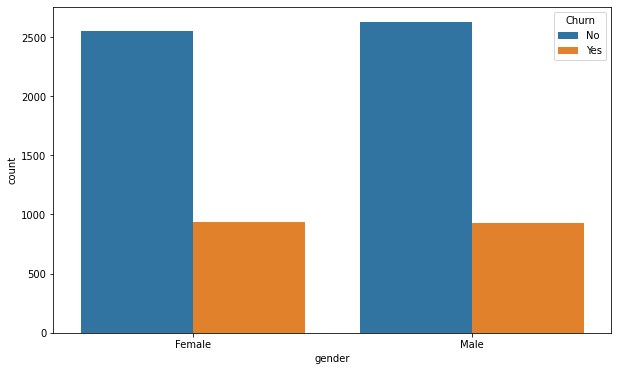

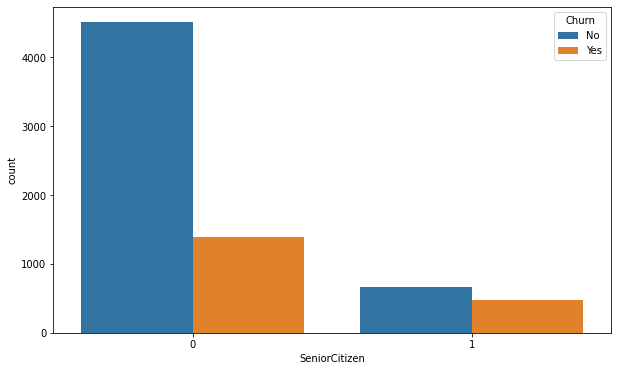

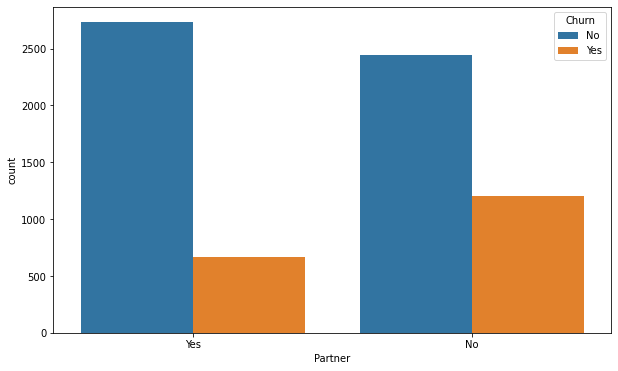

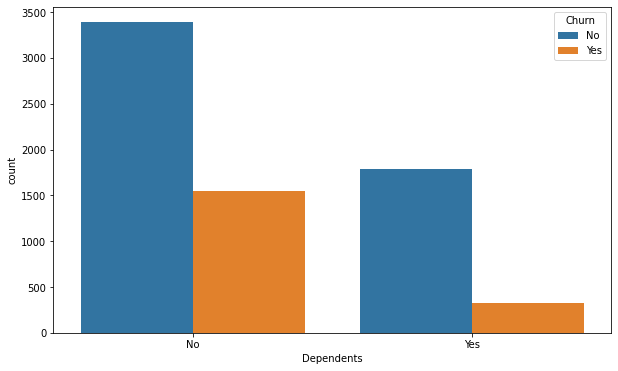

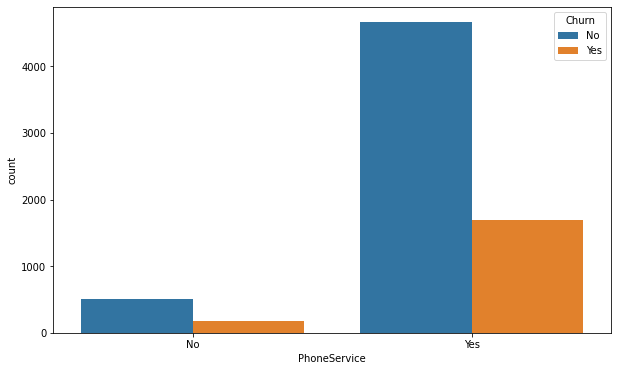

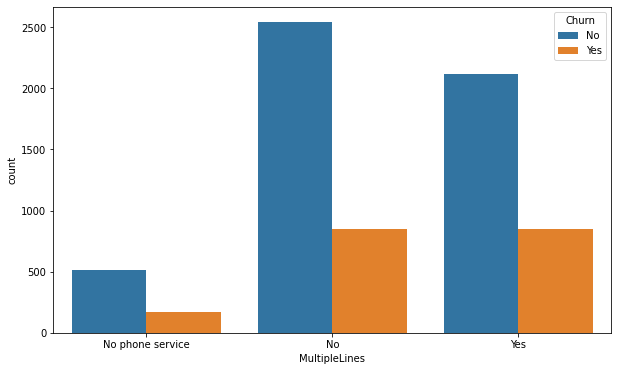

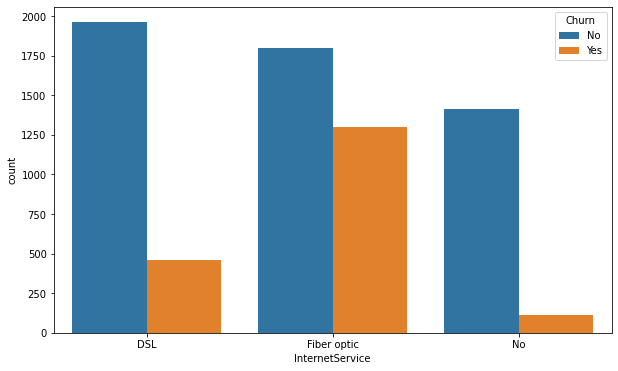

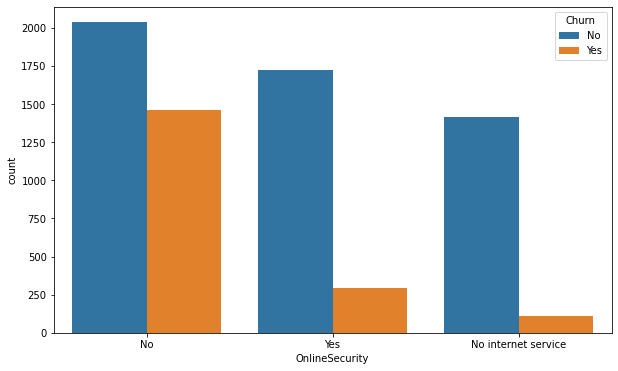

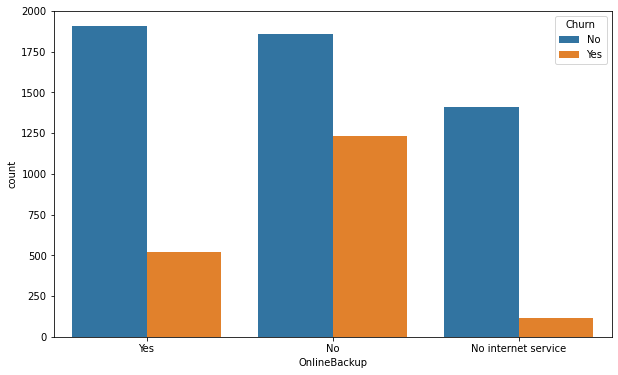

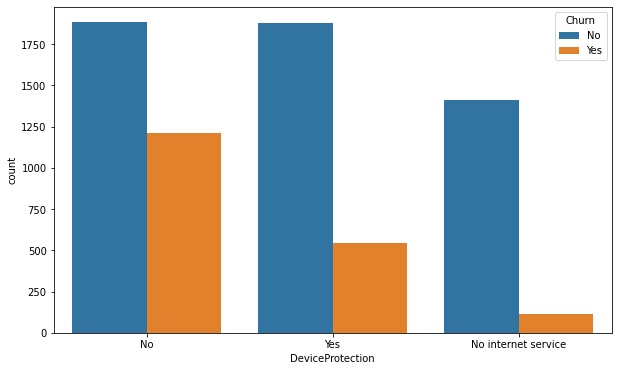

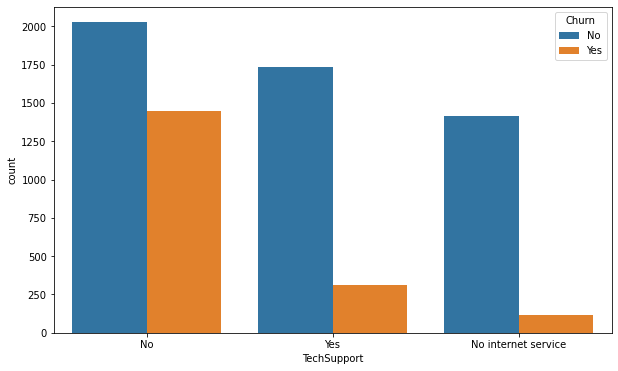

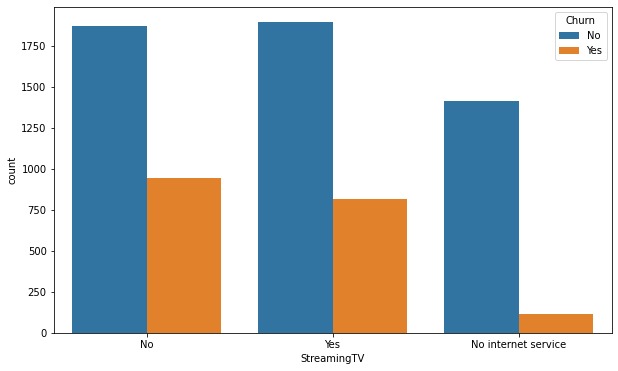

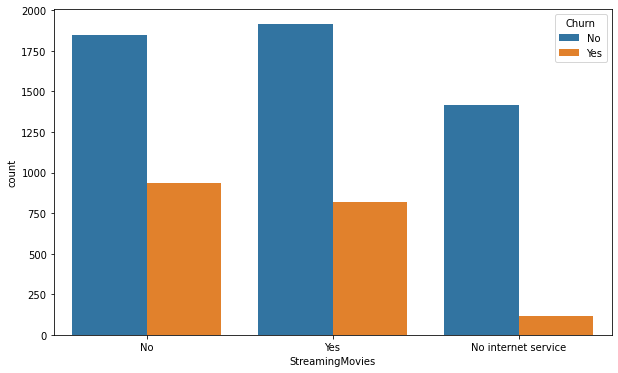

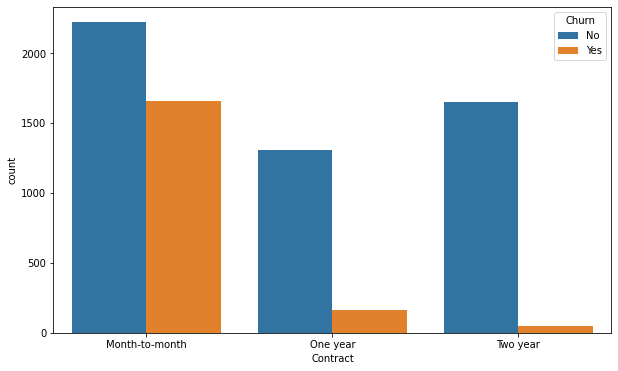

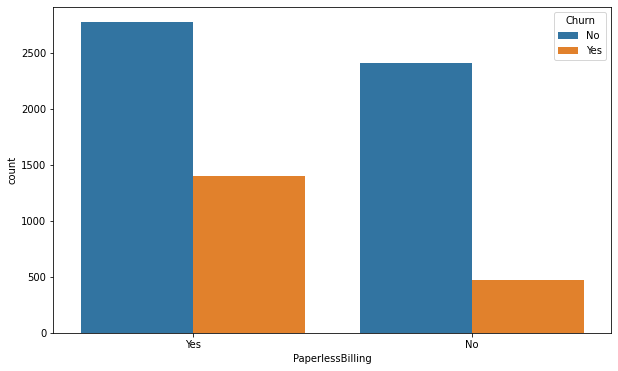

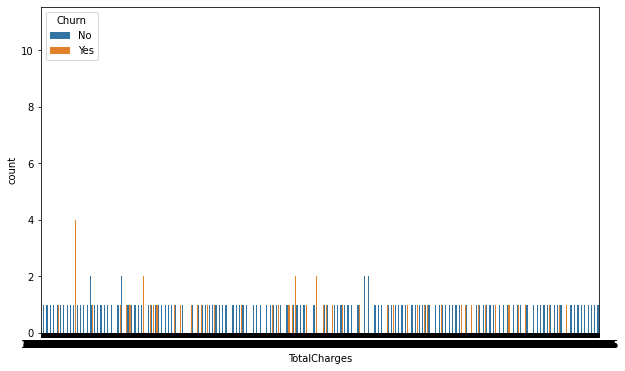

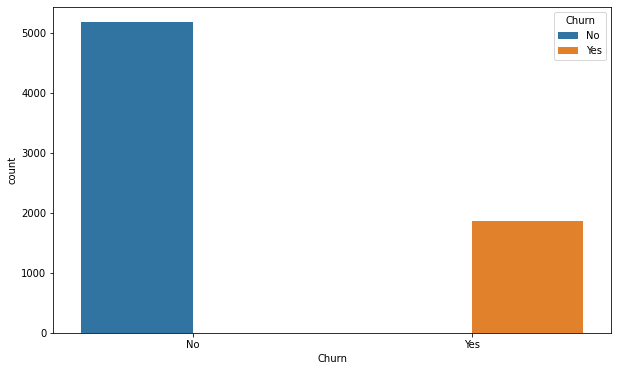

In [ ]:
for i in df_cata.columns:
  plt.figure(figsize=[10,6])
  sns.countplot(x=df_cata[i],data=df_cata,hue='Churn')


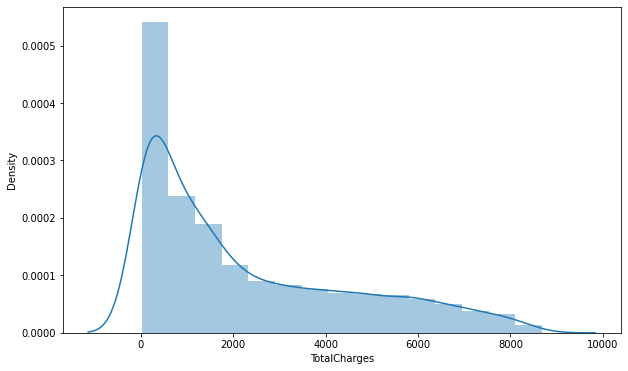

In [ ]:
plt.figure(figsize = (10, 6))
sns.distplot(df['TotalCharges'], bins = 15)

In [12]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

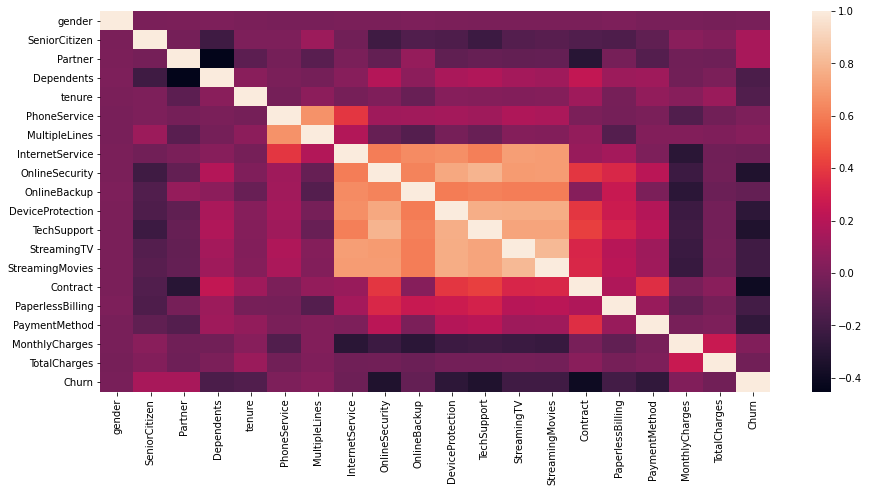

In [13]:
plt.figure(figsize=[15,7])
sns.heatmap(df_corr)


## **4. Data pre-processing**

**skewness removal**

In [ ]:
df_cont.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

There is not much skewness present in the data.

**Null Value removal**

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)

**Encoding**

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [10]:
df['Churn']=LE.fit_transform(df['Churn'])

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
x= df.drop(columns='Churn')
y= df['Churn']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

**Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(x)

## **5.train test split**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=101)

**Finding best Random State**

In [17]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  DTC.fit(x_train,y_train)
  pred_train=DTC.predict(x_train)
  pred_test = DTC.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 1.3886058380620758
least value 0 1.3886058380620758
1 1.40967161580518
2 1.4049549517879028
3 1.4447677650148039
4 1.5278751875016954
5 1.4377028410903248
6 1.4050525273244208
7 1.3023652082083417
least value 7 1.3023652082083417
8 1.293605463971761
least value 8 1.293605463971761
9 1.420079335363634
10 1.4141255727300936
11 1.3728547059641232
12 1.3547859893782663
13 1.5226325682313306
14 1.4526838275094964
15 1.3601178607326645
16 1.4046711283796125
17 1.4075432678715005
18 1.3731542820023204
19 1.372630384403085
20 1.4363848828144834
21 1.4223177788052237
22 1.3873515380216257
23 1.378766151014195
24 1.3845887906240466
25 1.4054240007844279
26 1.3287021484921824
27 1.3189469368272961
28 1.366776518460001
29 1.4195941551999565
30 1.2877056061603893
least value 30 1.2877056061603893
31 1.4746360174989204
32 1.3455935130116665
33 1.3928390709065832
34 1.4055891249552146
35 1.4556070705907183
36 1.2555517020066342
least value 36 1.2555517020066342
37 1.4238735848981339
38 1.3622951995

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=66)

## **6.Model Construction**

**RandomForestClassifier**

In [24]:
clf= RandomForestClassifier().fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))


[[1401  160]
 [ 290  262]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1561
           1       0.62      0.47      0.54       552

    accuracy                           0.79      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



In [25]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 10).mean()
randomforest_cv

0.7924137653127016

**LogisticRegression**

In [40]:
from sklearn.linear_model import LogisticRegression

LReg = LogisticRegression()

LReg.fit(x_train,y_train)

predLReg = LReg.predict(x_test)

reportLReg = classification_report(y_test, predLReg, output_dict = True)

crLReg = pd.DataFrame(reportLReg).transpose()
logisticregression_acc=accuracy_score(y_test,predLReg)
print(logisticregression_acc)
print(confusion_matrix(y_test, predLReg))
crLReg

0.8088026502602934
[[1405  141]
 [ 263  304]]


,precision,recall,f1-score,support
0,0.842326,0.908797,0.874300,1546.000000
1,0.683146,0.536155,0.600791,567.000000
accuracy,0.808803,0.808803,0.808803,0.808803
macro avg,0.762736,0.722476,0.737545,2113.000000
weighted avg,0.799612,0.808803,0.800907,2113.000000


In [41]:
logisticregression_cv= cross_val_score(LReg,x,y,scoring='accuracy', cv = 10).mean()
logisticregression_cv

0.8042035380399742

**SVC**

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7316611452910554
[[1546    0]
 [ 567    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1546
           1       0.00      0.00      0.00       567

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



In [43]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 10).mean()
svc_cv

0.7346300773694391

**GaussianNB**

In [44]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.7061050638902036


,precision,recall,f1-score,support
0,0.917796,0.657180,0.765925,1546.000000
1,0.473161,0.839506,0.605213,567.000000
accuracy,0.706105,0.706105,0.706105,0.706105
macro avg,0.695478,0.748343,0.685569,2113.000000
weighted avg,0.798483,0.706105,0.722800,2113.000000


In [45]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 10).mean()
gnb_cv

0.694731221792392

**DecisionTreeClassifier**

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.7160435399905348


,precision,recall,f1-score,support
0,0.807943,0.802717,0.805321,1546.000000
1,0.471404,0.479718,0.475524,567.000000
accuracy,0.716044,0.716044,0.716044,0.716044
macro avg,0.639673,0.641217,0.640423,2113.000000
weighted avg,0.717636,0.716044,0.716824,2113.000000


In [47]:
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.7204311734364925

**KNeighborsClassifier**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.7610033128253668


,precision,recall,f1-score,support
0,0.806357,0.886158,0.844376,1546.000000
1,0.574879,0.419753,0.485219,567.000000
accuracy,0.761003,0.761003,0.761003,0.761003
macro avg,0.690618,0.652955,0.664798,2113.000000
weighted avg,0.744242,0.761003,0.748000,2113.000000


In [49]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.7614635718891039

**Choosing decission tree classifier and random forest for hyper parameter tuning**

## **7.Hyper Parameters Tuning**

**RandomForestClassifier**

In [35]:
#With Hyper Parameters Tuning
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
rf_final=prediction
rf_finalmod=model1

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.7875059157595835
Confusion Metrix:
 [[1397  300]
 [ 149  267]]


In [27]:
clf= RandomForestClassifier(criterion= 'entropy',min_samples_leaf= 3,random_state= 123,n_jobs= -1)
clf.fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

[[1416  145]
 [ 284  268]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1561
           1       0.65      0.49      0.56       552

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113



In [29]:
svc_cv=cross_val_score(clf,x,y,scoring='accuracy', cv = 10).mean()
svc_cv

0.8026390232108318

## **8.Evaluation metrics**

In [31]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [35]:
print("Random Forest")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_rfc = accuracy_score(y_test, predRFC)
print('Accuracy: %f' % accuracy_rfc)
# precision tp / (tp + fp)
precision_rfc = precision_score(y_test, predRFC)
print('Precision: %f' % precision_rfc)
# recall: tp / (tp + fn)
recall_rfc = recall_score(y_test, predRFC)
print('Recall: %f' % recall_rfc)
# f1: 2 tp / (2 tp + fp + fn)
f1_rfc = f1_score(y_test, predRFC)
print('F1 score: %f' % f1_rfc)

Random Forest
-----------------------------------------
Accuracy: 0.796971
Precision: 0.648910
Recall: 0.485507
F1 score: 0.555440


### **roc_auc_score**

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
rf = RandomForestClassifier(criterion= 'entropy',min_samples_leaf= 3,random_state= 123,n_jobs= -1)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.02737515, 0.37665263, 0.0167619 , ..., 0.35611214, 0.4393593 ,
       0.34082099])

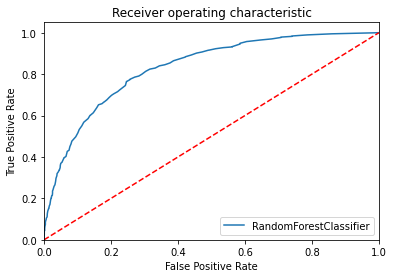

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='RandomForestClassifier'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## **9.Saving The Model**

In [36]:
import joblib
joblib.dump(clf,"final model.pkl")

['final model.pkl']